<a href="https://colab.research.google.com/github/Robertagcn/Robertagcn/blob/main/Boletim_Focus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Coletando dados do Boletim Focus com o Python - Análise Macro*** 

https://analisemacro.com.br/economia/indicadores/como-coletar-dados-do-boletim-focus-com-o-python/

In [1]:
#A biblioteca {python-bcb} realiza a conexão com a API do Banco Central
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 68 kB 4.1 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 


In [5]:
from bcb import Expectativas

In [3]:
import pandas as pd

In [6]:
from matplotlib import pyplot as plt

In [8]:
import seaborn as sns

In [15]:
# Utilizamos a função Expectativas() para instanciar com as informações da pesquisa. Salvamos em objeto com o nome "em" para utilizar o método describe() de forma a obtermos as pesquisas disponíveis e conectar com a que desejamos. No caso, queremos obter informações das Expectativas Anuais.

In [9]:
em = Expectativas()

In [11]:
em.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativasMercadoInstituicoes
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


In [12]:
em.describe('ExpectativasMercadoAnuais')


EntitySet (Endpoint): ExpectativasMercadoAnuais
EntityType: br.gov.bcb.olinda.servico.Expectativas.ExpectativaMercadoAnual
Properties: Indicador<str>, IndicadorDetalhe<str>, Data<str>, DataReferencia<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>, numeroRespondentes<int>, baseCalculo<int>


In [14]:
#Com as informações conhecidas sobre o data frame a ser importado, utilizamos o método get_endpoint() para conectar com a API do Banco Central e executar a consulta com .query()

In [16]:
ep = em.get_endpoint('ExpectativasMercadoAnuais')

In [ ]:
# Dados da Selic

In [19]:
selic_expec = (ep.query()
  .filter(ep.Indicador == 'Selic', ep.DataReferencia == 2023)
  .filter(ep.Data >= '2022-01-01')
  .filter(ep.baseCalculo == '0')
  .select(ep.Indicador, ep.Data, ep.Media, ep.Mediana, ep.DataReferencia)
  .collect()
  )

In [20]:
# Formata a coluna de Data para formato Datetime

In [22]:
selic_expec['Data'] = pd.to_datetime(selic_expec['Data'], format = '%Y-%m-%d')

In [23]:
# Configura o tema do gráfico

In [25]:
#Cores
colors = ['#282f6b', '#b22200', '#eace3f', '#224f20', '#b35c1e', '#419391', '#839c56', '#3b89bc']

#Tamanho
theme = {'figure.figsize' : (15,10)}

#Aplicar o tema
sns.set_theme(rc = theme,
              palette = colors)

Text(1.0, -0.07, 'Fonte: analisemacro.com.br com dados do BCB/SGS')

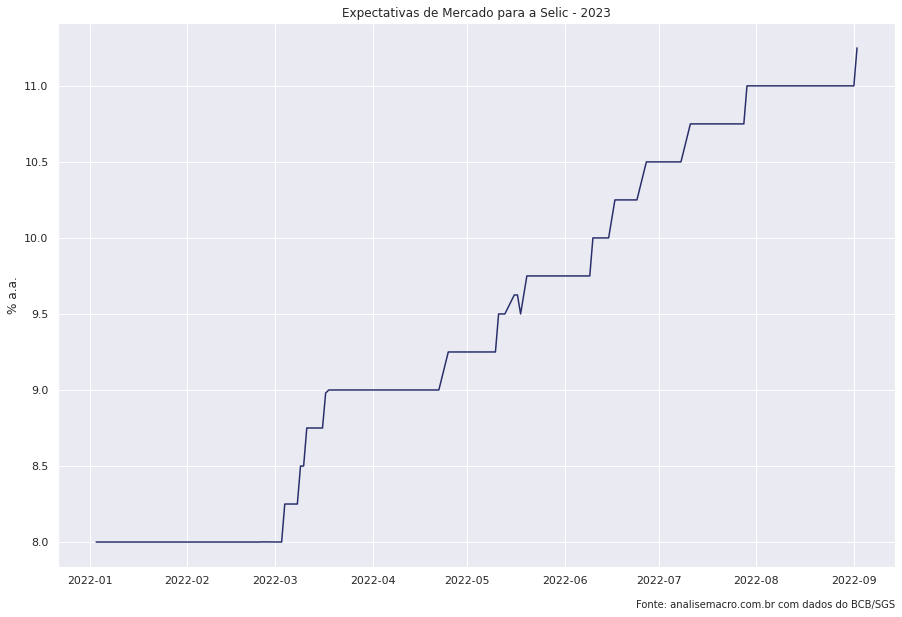

In [28]:
#Lineplot
sns.lineplot(x = 'Data',
             y = 'Mediana',
             data = selic_expec).set(title = 'Expectativas de Mercado para a Selic - 2023',
                                     xlabel = '',
                                     ylabel = '% a.a.')
             
#Adiciona a fonte do gráfico
plt.annotate('Fonte: analisemacro.com.br com dados do BCB/SGS',
             xy = (1.0, -0.07),
             xycoords = 'axes fraction',
             ha = 'right',
             va = 'center',
             fontsize = 10)